[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/statistics_by_python.ipynb)

<function matplotlib.pyplot.show>

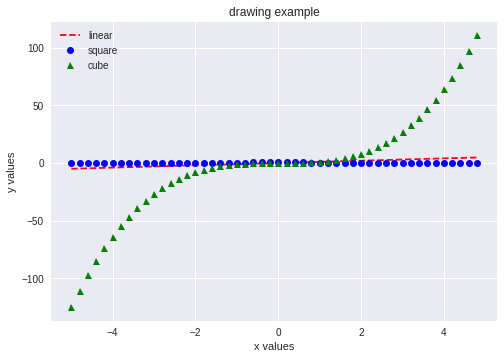

In [11]:
import numpy as np
import matplotlib.pyplot as plt
t=np.arange(-5,5,0.2)
plt.title('drawing example')
plt.plot(t,t,'r--',label='linear')
plt.plot(t,t**2/(t**2+1)**3+1/(t**2+1)**3,'bo',label='square')
plt.plot(t,t**3,'g^',label='cube')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(loc=2)
plt.show

mean= 500.676 std= 15.4731 var= 239.417


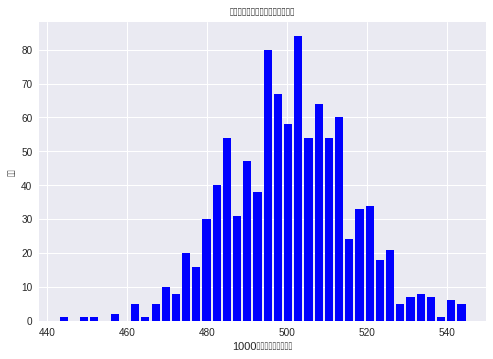

In [21]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
n=1000
p=0.5
b=[]
for i in range(1000):
  v=[1 if u>p else 0 for u in uniform.rvs(loc=0,scale=1,size=n)]
  b.append(sum(v))
  
print('mean=',np.mean(b).round(4),'std=',np.std(b).round(4),'var=',np.var(b).round(4))
plt.hist(b,rwidth=0.8, bins=40, color='blue')
plt.title('コイン投げで表の出る回数の分布')
plt.xlabel('1000回試行中の表の回数')
plt.ylabel('頻度')
plt.show()

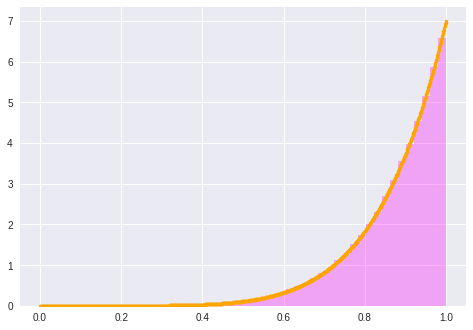

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

nbins=40
np.random.seed()
N=100000
U=scipy.stats.uniform(loc=0.0,scale=1.0).rvs(size=N)
X=U**(1/7)
x=plt.hist(X,nbins,color='magenta',normed=True,alpha=0.3)
x=np.linspace(0,1,1000)
y=7*(x**6)
plt.plot(x,y,'r.-',color='orange',linewidth=.05)
plt.show()
                      
   

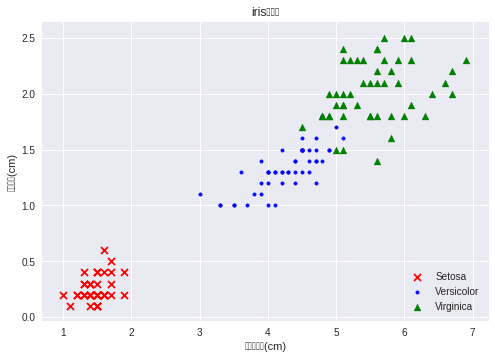

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()
species=['Setosa','Versicolor','Virginica']
irispddata=pd.DataFrame(iris.data,columns=iris.feature_names)
irispdtarget=pd.DataFrame(iris.target,columns=['target'])
irispd=pd.concat([irispddata,irispdtarget],axis=1)
irispd0=irispd[irispd.target==0]
irispd1=irispd[irispd.target==1]
irispd2=irispd[irispd.target==2]
plt.scatter(irispd0['petal length (cm)'],irispd0['petal width (cm)'],c='red',label=species[0],marker='x')
plt.scatter(irispd1['petal length (cm)'],irispd1['petal width (cm)'],c='blue',label=species[1],marker='.')
plt.scatter(irispd2['petal length (cm)'],irispd2['petal width (cm)'],c='green',label=species[2],marker='^')
plt.title('iris散布図')
plt.xlabel('花弁の長さ(cm)')
plt.ylabel('花弁の幅(cm)')
plt.legend(loc=4)
plt.show()


主成分 [[ 0.3616 -0.0823  0.8566  0.3588]
 [ 0.6565  0.7297 -0.1758 -0.0747]
 [-0.581   0.5964  0.0725  0.5491]
 [ 0.3173 -0.3241 -0.4797  0.7511]]
平均 [5.8433 3.054  3.7587 1.1987]
分散 [4.2248 0.2422 0.0785 0.0237]
共分散 [[ 0.6857 -0.0393  1.2737  0.5169]
 [-0.0393  0.188  -0.3217 -0.118 ]
 [ 1.2737 -0.3217  3.1132  1.2964]
 [ 0.5169 -0.118   1.2964  0.5824]]
寄与率 [0.9246 0.053  0.0172 0.0052]
累積寄与率 [0.9246 0.9776 0.9948 1.    ]


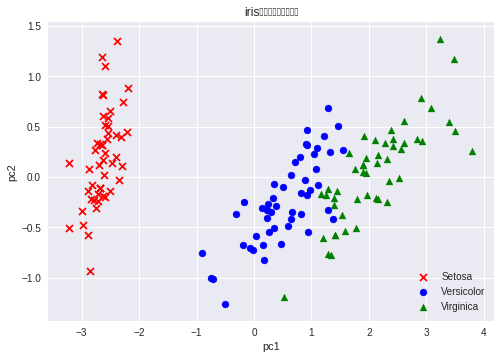

In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
colors=['red','blue','green']
markers=['x','o','^']
iris=load_iris()
species=['Setosa','Versicolor','Virginica']
irisdata=pd.DataFrame(iris.data,columns=iris.feature_names)
iristarget=pd.DataFrame(iris.target,columns=['target'])
irispd=pd.concat([irisdata,iristarget],axis=1)
pca=PCA(n_components=4)
pca.fit(irisdata)
print('主成分',pca.components_.round(4))
print('平均',pca.mean_.round(4))
print('分散',pca.explained_variance_.round(4))
print('共分散',pca.get_covariance().round(4))
print('寄与率',pca.explained_variance_ratio_.round(4))
print('累積寄与率',np.cumsum(pca.explained_variance_ratio_).round(4))
transformed0=pca.transform(irisdata[irispd.target==0])
transformed1=pca.transform(irisdata[irispd.target==1])
transformed2=pca.transform(irisdata[irispd.target==2])
plt.scatter([u[0] for u in transformed0],[u[1] for u in transformed0],c='red',label=species[0],marker='x')
plt.scatter([u[0] for u in transformed1],[u[1] for u in transformed1],c='blue',label=species[1],marker='o')
plt.scatter([u[0] for u in transformed2],[u[1] for u in transformed2],c='green',label=species[2],marker='^')
plt.title('irisデータの主成分分析')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc='best')
plt.show()

主成分 [[ 0.5224 -0.2634  0.5813  0.5656]
 [ 0.3723  0.9256  0.0211  0.0654]
 [-0.721   0.242   0.1409  0.6338]
 [-0.262   0.1241  0.8012 -0.5235]]
平均 [-0. -0. -0. -0.]
分散 [2.9304 0.9274 0.1483 0.0207]
共分散 [[ 1.0067 -0.1101  0.8776  0.8234]
 [-0.1101  1.0067 -0.4233 -0.3589]
 [ 0.8776 -0.4233  1.0067  0.9692]
 [ 0.8234 -0.3589  0.9692  1.0067]]
各次元の寄与率 [0.7277 0.2303 0.0368 0.0052]
累積寄与率 [0.7277 0.958  0.9948 1.    ]
標準偏差         0      1       2      3
0  1.7118  0.963  0.3852  0.144


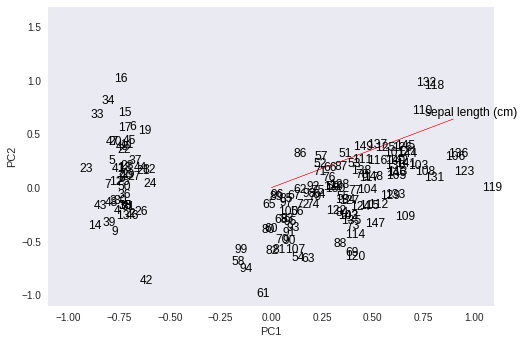

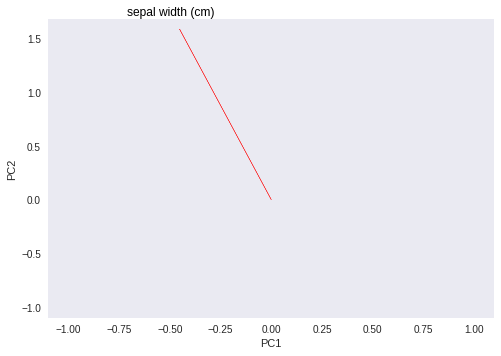

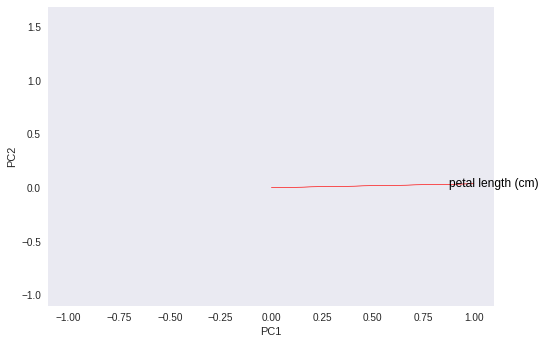

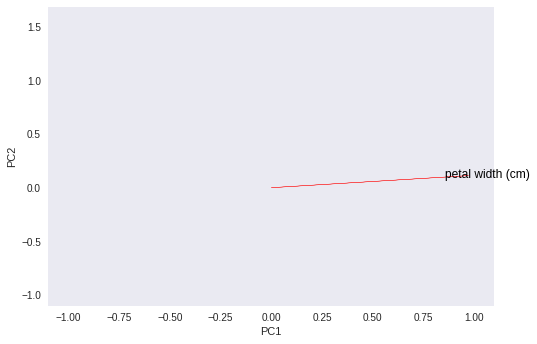

In [25]:
import math
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, FactorAnalysis 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

def biplot(score, coeff, pcax, pcay, labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 2.0/(xs.max()- xs.min())
  scaley = 2.0/(ys.max()- ys.min())
    #plt.scatter(xs*scalex,ys*scaley)
  for i in range(len(xs)):
    plt.text(xs[i]*scalex, ys[i]*scaley, str(i+1), color='k', ha='center', va='center')
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=1.0)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.10, coeff[i,pca2] * 1.10, "Var"+str(i+1), color='k', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.10, coeff[i,pca2] * 1.10, labels[i], color='k', ha='center', va='center')

    plt.xlim(min(coeff[:,pca1].min()-0.1, -1.1), max(coeff[:,pca1].max()+0.1, 1.1))
    plt.ylim(min(coeff[:,pca2].min()-0.1, -1.1), max(coeff[:,pca2].max()+0.1, 1.1))
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    plt.show()

  
iris=load_iris()
species=['Setosa','Versicolor','Virginica']
irisdata=pd.DataFrame(scale(iris.data),columns=iris.feature_names)
iristarget=pd.DataFrame(iris.target,columns=['target'])
irispd=pd.concat([irisdata,iristarget],axis=1)
pca=PCA(n_components=4)
pca.fit(irisdata)
print('主成分',pca.components_.round(4))
print('平均',pca.mean_.round(4))
print('分散',pca.explained_variance_.round(4))
print('共分散',pca.get_covariance().round(4))
print('各次元の寄与率',pca.explained_variance_ratio_.round(4))
print('累積寄与率',np.cumsum(pca.explained_variance_ratio_).round(4))
print('標準偏差',pd.DataFrame([math.sqrt(u) for u in pca.explained_variance_]).T.round(4))
u=pd.DataFrame([[math.sqrt(u) for u in pca.explained_variance_]]*9)
u = pd.DataFrame([ [math.sqrt(u) for u in pca.explained_variance_] ] * 9)
u0 = u[0][0]
pca_components = pd.DataFrame(pca.components_)

x = pca.components_[0,:]*u0
y = pca.components_[1,:]*u0
fuka = (np.array([x, y])).T
biplot(pca.transform(irisdata), fuka, 1,2, labels=irisdata.columns)
